In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 5,
                      "train_percentage" : 0.8,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 1000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                "ewc_lambda" : (400,400)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(2)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-25 11:39:56,604] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-25 11:39:56 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 58.41it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3704
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8910
100%|██████████| 376/376 [00:06<00:00, 58.19it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1185
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9628
100%|██████████| 376/376 [00:06<00:00, 61.66it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0949
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9701
-- >> End of training phase << --


[I 2024-07-25 11:40:21,225] Trial 0 finished with value: 96.65095744680853 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 96.65095744680853.


-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 59.77it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3263
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9014
100%|██████████| 376/376 [00:06<00:00, 60.86it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1177
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9631
100%|██████████| 376/376 [00:06<00:00, 61.32it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0947
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9706
-- >> End of training phase << --


[I 2024-07-25 11:40:48,824] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-25 11:40:48 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 55.03it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5194
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8798
100%|██████████| 376/376 [00:06<00:00, 55.08it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2524
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9521
100%|██████████| 376/376 [00:06<00:00, 55.13it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2133
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9621
-- >> End of training phase << --


[I 2024-07-25 11:41:16,178] Trial 0 finished with value: 93.95686170212764 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 93.95686170212764.


-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 54.65it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4866
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8867
100%|██████████| 376/376 [00:06<00:00, 54.48it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2455
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9528
100%|██████████| 376/376 [00:06<00:00, 54.66it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2290
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9592
-- >> End of training phase << --


[I 2024-07-25 11:41:45,950] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-25 11:41:45 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 53.89it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5122
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9003
100%|██████████| 376/376 [00:07<00:00, 53.55it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3359
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9486
100%|██████████| 376/376 [00:06<00:00, 53.78it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2980
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9604
-- >> End of training phase << --


[I 2024-07-25 11:42:14,875] Trial 0 finished with value: 93.65248226950354 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 93.65248226950354.


-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 54.17it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5177
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8983
100%|██████████| 376/376 [00:06<00:00, 54.29it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3259
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9509
100%|██████████| 376/376 [00:06<00:00, 54.31it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2889
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9605
-- >> End of training phase << --


[I 2024-07-25 11:42:44,753] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-25 11:42:44 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:07<00:00, 49.26it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6908
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8892
100%|██████████| 376/376 [00:07<00:00, 49.71it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4620
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9461
100%|██████████| 376/376 [00:07<00:00, 49.54it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4209
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9553
-- >> End of training phase << --


[I 2024-07-25 11:43:16,743] Trial 0 finished with value: 91.15872340425534 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 91.15872340425534.


-- >> Start of training phase << --
100%|██████████| 376/376 [00:07<00:00, 47.84it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6872
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8876
100%|██████████| 376/376 [00:07<00:00, 47.57it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5433
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9410
100%|██████████| 376/376 [00:07<00:00, 47.13it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4301
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9550
-- >> End of training phase << --


[I 2024-07-25 11:43:49,762] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-25 11:43:49 +0200
-- >> Start of training phase << --
100%|██████████| 376/376 [00:07<00:00, 47.80it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8079
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8884
100%|██████████| 376/376 [00:08<00:00, 45.95it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6001
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9407
100%|██████████| 376/376 [00:07<00:00, 47.00it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5328
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9509
-- >> End of training phase << --


[I 2024-07-25 11:44:24,137] Trial 0 finished with value: 86.25717021276596 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 86.25717021276596.


-- >> Start of training phase << --
100%|██████████| 376/376 [00:08<00:00, 46.01it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8297
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8841
100%|██████████| 376/376 [00:08<00:00, 45.63it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5751
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9418
100%|██████████| 376/376 [00:08<00:00, 46.09it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5418
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9500
-- >> End of training phase << --


## Visualize results

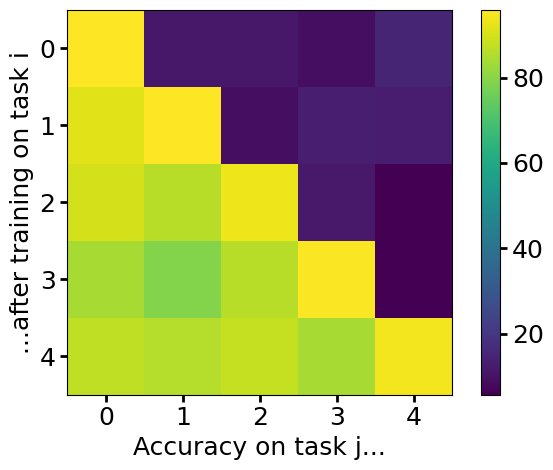

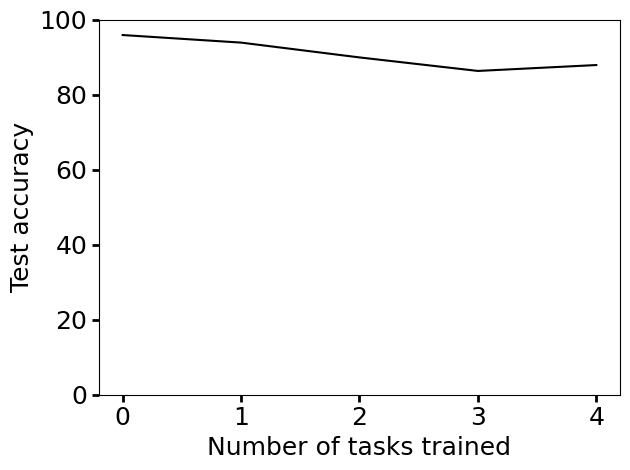

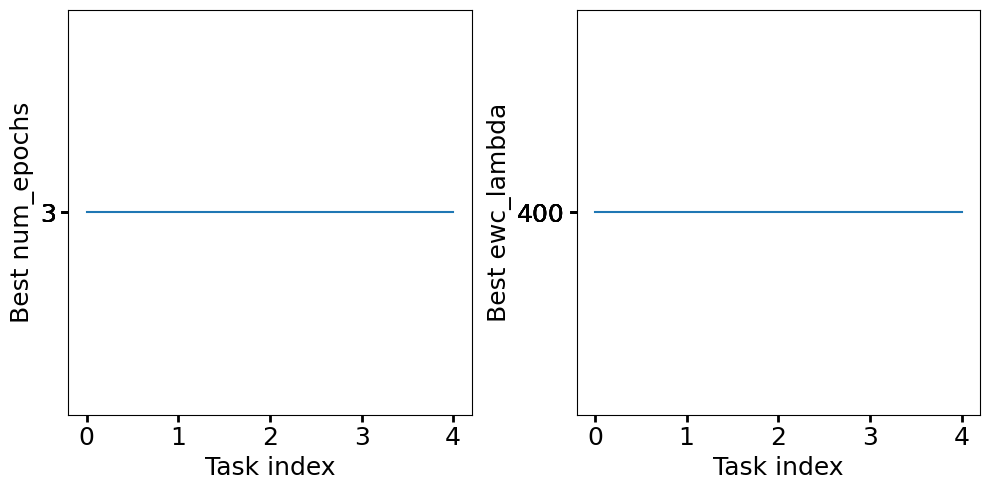

In [8]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [9]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --


100%|██████████| 376/376 [00:06<00:00, 62.50it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3204
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9060
100%|██████████| 376/376 [00:05<00:00, 63.33it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1184
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9634
100%|██████████| 376/376 [00:06<00:00, 61.32it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0946
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9697
-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --
100%|██████████| 376/376 [00:06<00:00, 55.35it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4799
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8850
100%|██████████| 376/376 [00:06<00:00, 55.54it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2371
	Top1_Acc_Epoch/train_phase/train_s

## Visualize validation

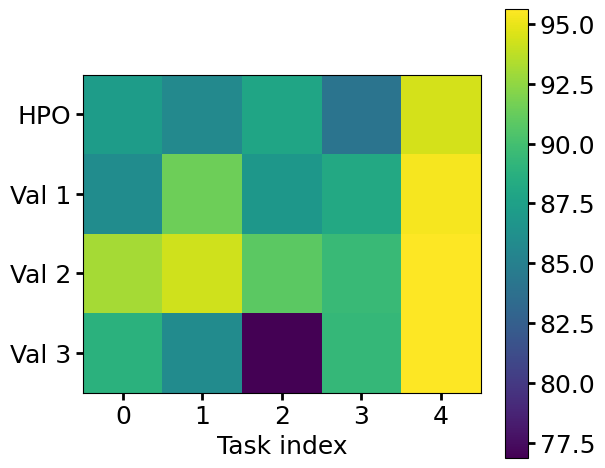

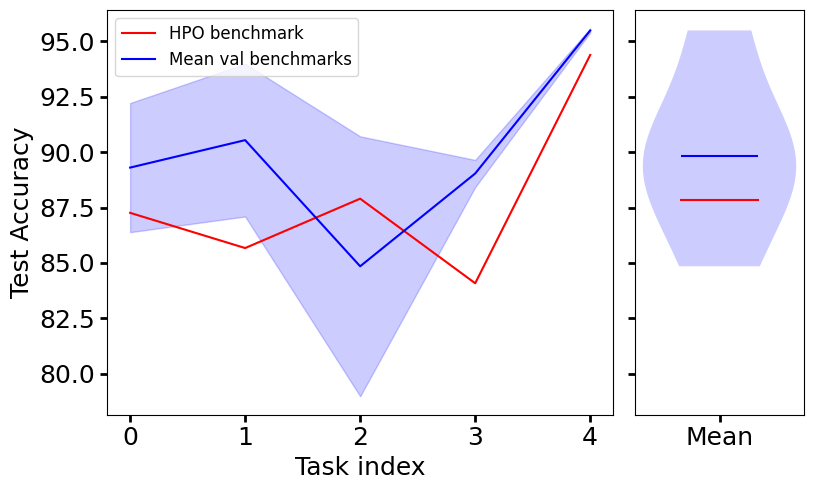

In [10]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [11]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)